In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [3]:
file_path = "Iris.csv"
df = pd.read_csv(file_path)

In [4]:
df = df.drop(columns=["Id"])

In [5]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])


In [6]:
X = df.drop(columns=["Species"])
y = df["Species"]

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
model = LogisticRegression(max_iter=200)
model.fit(X, y)

LogisticRegression(max_iter=200)

In [9]:
y_pred = model.predict(X)

In [10]:
accuracy = accuracy_score(y, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.97


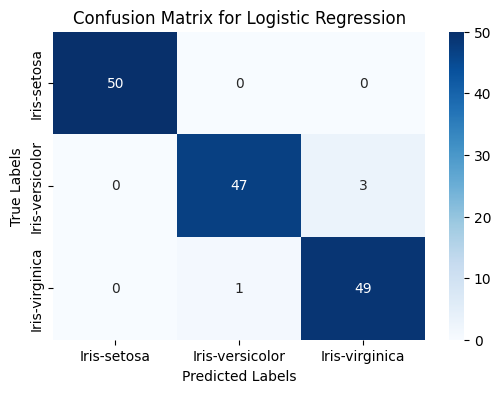

In [11]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [12]:
print(classification_report(y, y_pred, target_names=label_encoder.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



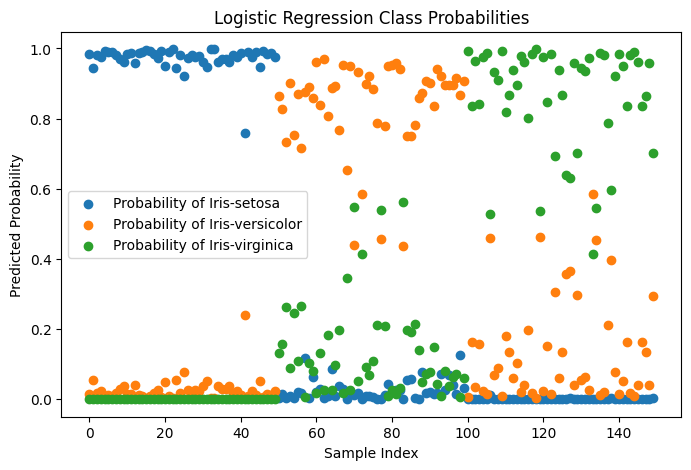

In [13]:
y_prob = model.predict_proba(X)  # Get probability for all classes

plt.figure(figsize=(8, 5))
for i, class_name in enumerate(label_encoder.classes_):
    plt.scatter(range(len(y)), y_prob[:, i], label=f'Probability of {class_name}')

plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Class Probabilities')
plt.legend()
plt.show()